In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['Price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [21]:
y = bos['Price']
X = bos.drop(['Price', 'INDUS','AGE'], axis=1)

In [22]:
import statsmodels.api as sm
xc = sm.add_constant(X)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          5.74e-137
Time:                        11:06:51   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3073.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3694      5.069      7.176      0.0

### Assumption-1 Normality of Residuals

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


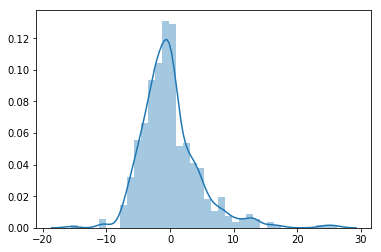

In [26]:
residuals = result.resid
sns.distplot(residuals)
plt.show()

In [27]:
residuals.mean()

-3.4645979541583147e-14

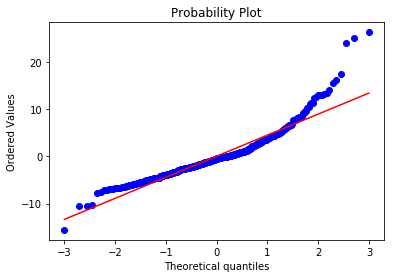

In [34]:
import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.show()

QQ plot shows that residual are close to normality around the mean. It deviates from normality at extreme values.

In [36]:
## Jarque-Berra Test

print(stats.jarque_bera(residuals))

(786.9437973096623, 0.0)


In [38]:
## Log transform y 

lny = np.log(y)
lin_reg = sm.OLS(lny, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.0
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          4.70e-159
Time:                        11:54:43   Log-Likelihood:                 128.93
No. Observations:                 506   AIC:                            -233.9
Df Residuals:                     494   BIC:                            -183.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0866      0.203     20.120      0.0

In [39]:
## Test for Normality of residuals after transformation

residuals = result.resid
print(stats.jarque_bera(residuals))

(228.0234501762033, 0.0)


C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


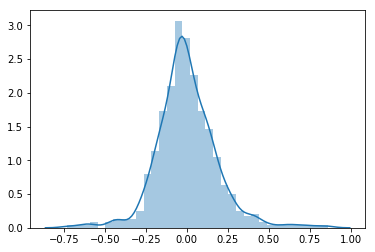

In [40]:
sns.distplot(residuals)
plt.show()

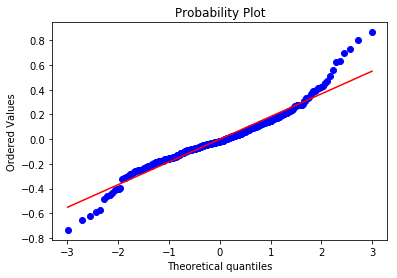

In [41]:
import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.show()

In [43]:
df = bos.copy()
df_log = df.transform(lambda x: np.log(x))

C:\Users\Classroom\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [44]:
df_log.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,2.890372,0.837248,-inf,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,-inf,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,-inf,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,-inf,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,-inf,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


In [45]:
df = bos.copy()
df_sqrt = df.transform(lambda x: x**(0.5))

In [46]:
df_sqrt.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


In [51]:
y = df_sqrt['Price']
X = df_sqrt.drop(['Price', 'ZN', 'INDUS', 'AGE'], axis=1)

In [52]:
import statsmodels.api as sm
xc = sm.add_constant(X)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     195.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          1.24e-164
Time:                        12:11:11   Log-Likelihood:                -279.94
No. Observations:                 506   AIC:                             581.9
Df Residuals:                     495   BIC:                             628.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2766      0.900     11.422      0.0

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


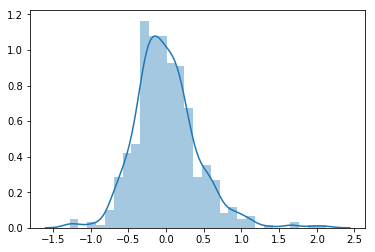

In [53]:
residuals=result.resid
sns.distplot(residuals)

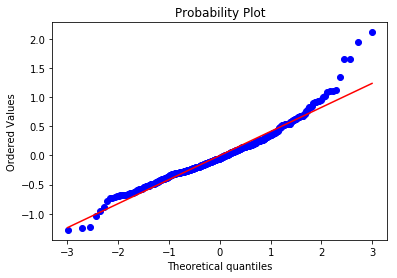

In [54]:
import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.show()

#### Assumption-2 Multicollinearity

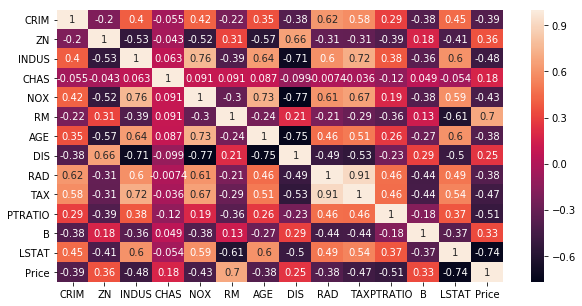

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(bos.corr(), annot=True)
plt.show()

In [93]:
y = bos['Price']
X = bos.drop(['Price','AGE', 'INDUS','TAX','RAD','ZN','LSTAT','NOX','RM'], axis=1)

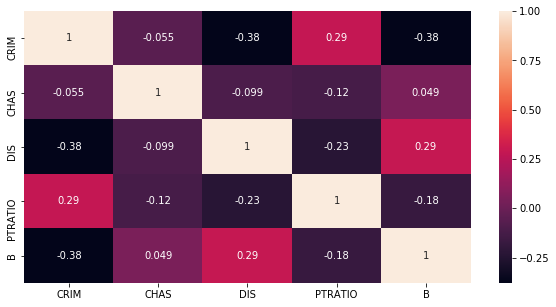

In [94]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif}, index=X.columns)

,vif
CRIM,1.569799
CHAS,1.093213
DIS,4.964420
PTRATIO,16.619150
B,16.151919


In [96]:
xc = sm.add_constant(X)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     56.93
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           7.79e-47
Time:                        12:44:49   Log-Likelihood:                -1726.2
No. Observations:                 506   AIC:                             3464.
Df Residuals:                     500   BIC:                             3490.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.1829      3.492     13.511      0.0

#### Assumption-3 Constant variance of residuals(Homoscedasticity)

In [97]:
y = bos['Price']
X = bos.drop('Price', axis=1)

In [98]:
xc = sm.add_constant(X)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          6.95e-135
Time:                        12:53:35   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

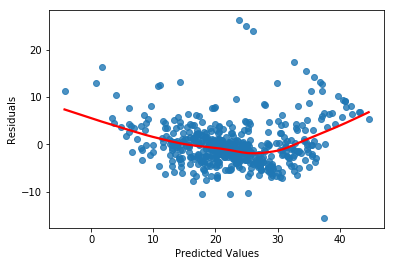

In [104]:
residuals = result.resid
y_pred = result.predict(xc)

sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [113]:
import statsmodels.stats.api as sms
name = ['F statistic', 'p value']

test = sms.het_goldfeldquandt(y=result.resid, x=xc)
test

(2.4299406694025034, 7.48849360137657e-12, 'increasing')

#### Assumption-4 Auto-correlation

C:\Users\Classroom\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


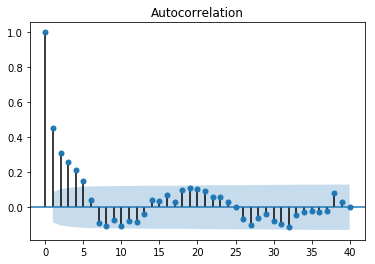

In [116]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residuals, lags=40)
acf.show()

The ACF chart shows moderate correlation with errors of lag 1. This indicate mild autocorrelation also supported by DW-statiastics of 1.078

#### Assumption-5 Linearity of Relationship

In [117]:
xc = sm.add_constant(X)
lin_reg = sm.OLS(y, xc)
result = lin_reg.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 22 Oct 2019   Prob (F-statistic):          6.95e-135
Time:                        14:33:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

In [118]:
y_pred = result.predict(xc)

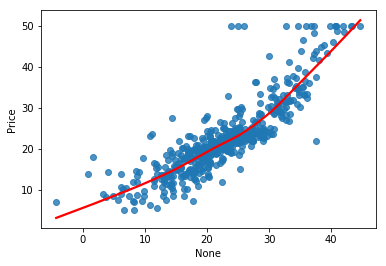

In [120]:
sns.regplot(x=y_pred, y=y, lowess=True, line_kws={'color':'red'})
plt.show()